# Uji Statistik data kimia farma

Menguji Perbedaan
→ Mengetahui apakah ada perbedaan signifikan antar kelompok variabel.

Mengukur Hubungan
→ Melihat keterkaitan antar variabel.

Membantu Pengambilan Keputusan
→ Memberikan dasar ilmiah apakah perbedaan/fluktuasi data benar-benar signifikan atau hanya variasi acak.

Validasi Hasil Analisis
→ Memastikan kesimpulan yang diambil tidak hanya berdasarkan visualisasi, tapi juga terbukti secara statistik.

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/kf_analysis.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672458 entries, 0 to 672457
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   transaction_id         672458 non-null  object 
 1   date                   672458 non-null  object 
 2   branch_id              672458 non-null  int64  
 3   branch_name            672458 non-null  object 
 4   kota                   672458 non-null  object 
 5   provinsi               672458 non-null  object 
 6   rating_cabang          672458 non-null  float64
 7   customer_name          672458 non-null  object 
 8   product_id             672458 non-null  object 
 9   product_name           672458 non-null  object 
 10  actual_price           672458 non-null  float64
 11  discount_percentage    672458 non-null  float64
 12  persentase_gross_laba  672458 non-null  int64  
 13  nett_sales             672458 non-null  float64
 14  nett_profit            672458 non-nu

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Melihat hubungan antar variabel

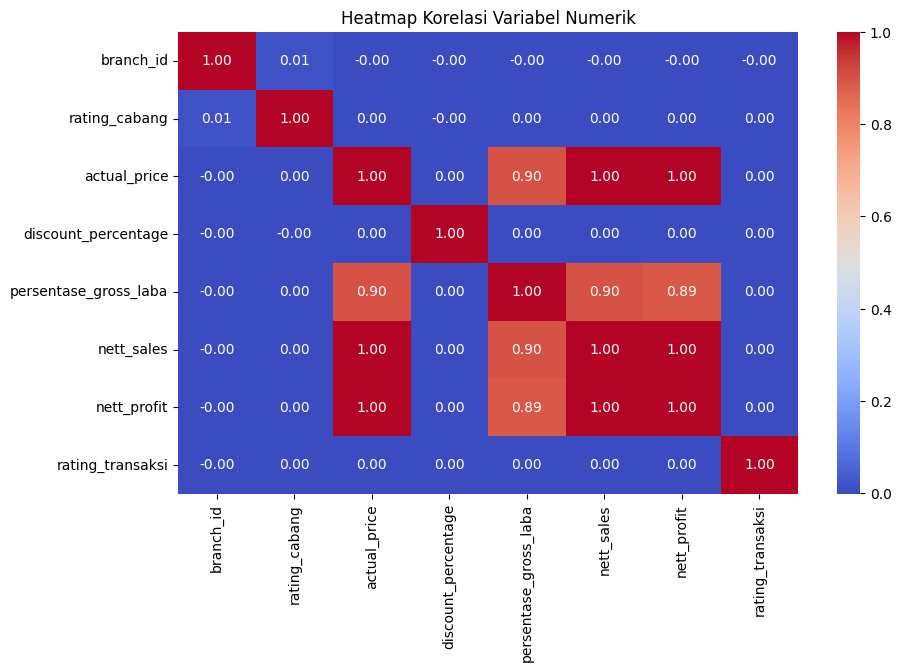

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()


Interpretasi Korelasi Tinggi

actual_price, nett_sales, nett_profit
Korelasi sangat kuat (1.00), ini menunjukkan ketiga variabel saling berhubungan kuat.
> Artinya: nilai nett sales & nett profit sangat dipengaruhi actual price.

persentase_gross_laba dengan actual_price, nett_sales, nett_profit
Korelasi sangat kuat (0.89 – 0.90).
> Artinya: semakin tinggi harga & penjualan, semakin tinggi margin laba kotor.

### melihat distribusi Nett Sales dan Nett Profit

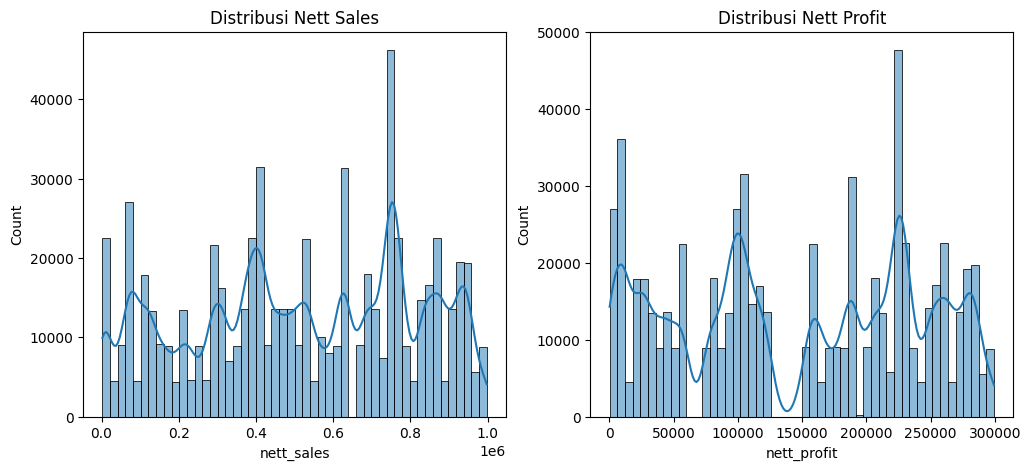

In [6]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['nett_sales'], bins=50, kde=True)
plt.title("Distribusi Nett Sales")

plt.subplot(1,2,2)
sns.histplot(df['nett_profit'], bins=50, kde=True)
plt.title("Distribusi Nett Profit")

plt.show()


Kesimpulan 

Sales dan Profit berdistribusi tidak merata (fluktuatif).

Ada hubungan erat antara penjualan dan profit (sesuai hasil korelasi).

Beberapa produk/cabang/daerah berkemungkinan jadi kontributor utama profit.

In [7]:
from scipy import stats

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

sales_2020 = df[df['year'] == 2020]['nett_sales']
sales_2021 = df[df['year'] == 2021]['nett_sales']
sales_2022 = df[df['year'] == 2022]['nett_sales']
sales_2023 = df[df['year'] == 2023]['nett_sales']


In [8]:
f_stat, p_val = stats.f_oneway(sales_2020, sales_2021, sales_2022, sales_2023)
print("ANOVA Nett Sales")
print("F-statistic:", f_stat, "P-value:", p_val)


ANOVA Nett Sales
F-statistic: 0.9076225234576929 P-value: 0.43635575649787917


In [11]:
profit_2020 = df[df['year'] == 2020]['nett_profit']
profit_2021 = df[df['year'] == 2021]['nett_profit']
profit_2022 = df[df['year'] == 2022]['nett_profit']
profit_2023 = df[df['year'] == 2023]['nett_profit']

f_stat_p, p_val_p = stats.f_oneway(profit_2020, profit_2021, profit_2022, profit_2023)
print("ANOVA Nett Profit")
print("F-statistic:", f_stat_p, "P-value:", p_val_p)


ANOVA Nett Profit
F-statistic: 0.8330650646024423 P-value: 0.47543705103748


Hipotesis nol (H₀): Tidak ada perbedaan rata-rata nett sales antar tahun (2020–2023).

Hipotesis alternatif (H₁): Ada perbedaan rata-rata nett sales antar tahun.

Karena p-value = 0.436 > 0.05, maka:

Tidak cukup bukti untuk menolak H₀.

Artinya, rata-rata nett sales 2020–2023 tidak berbeda signifikan secara statistik.

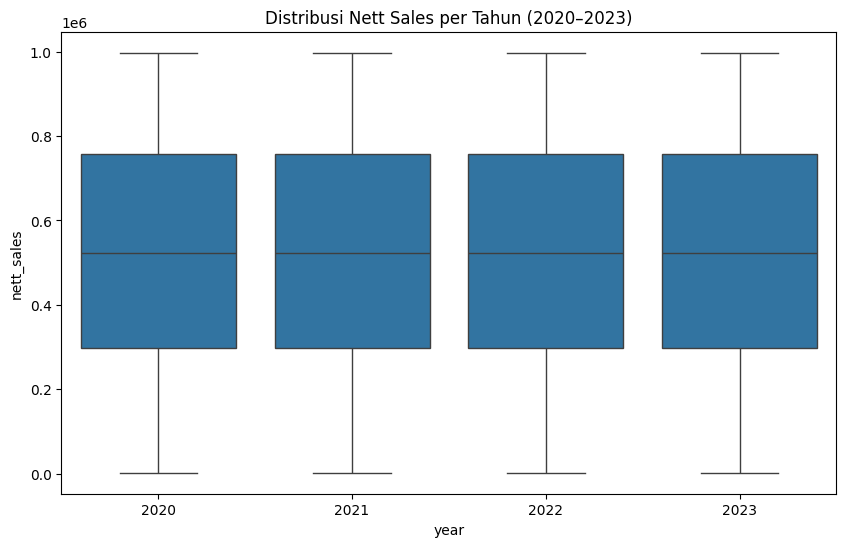

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x="year", y="nett_sales", data=df)
plt.title("Distribusi Nett Sales per Tahun (2020–2023)")
plt.show()


Median nett sales tiap tahun (garis horizontal di dalam box) relatif sama dari 2020–2023.

Distribusi (box dan whisker) juga hampir identik, artinya penyebaran nilai nett sales tidak banyak berubah antar tahun.

Hasil ini konsisten dengan uji ANOVA (p-value > 0.05) → tidak ada perbedaan signifikan antar tahun.

### Post-hoc ANOVA Nett Sales 2020–2023

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sales_data = df[['nett_sales','year']]

tukey_sales = pairwise_tukeyhsd(endog=sales_data['nett_sales'],
                                groups=sales_data['year'],
                                alpha=0.05)
print(tukey_sales)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
  2020   2021  392.8656 0.9782  -2126.178 2911.9091  False
  2020   2022  993.6334 0.7408 -1521.8688 3509.1355  False
  2020   2023 1500.9313 0.4193 -1018.9758 4020.8383  False
  2021   2022  600.7678 0.9281 -1918.3093 3119.8449  False
  2021   2023 1108.0657 0.6721   -1415.41 3631.5414  False
  2022   2023  507.2979  0.955 -2012.6427 3027.2384  False
----------------------------------------------------------


Semua pasangan tahun (2020 vs 2021, 2020 vs 2022, dst.) memiliki p-adj > 0.05.

Kolom reject semuanya False → artinya tidak ada perbedaan signifikan antara rata-rata nett sales antar tahun.

Selisih rata-rata (meandiff) antar tahun hanya beberapa ratus sampai seribu-an, dan rentang CI (lower–upper) selalu melewati angka 0 → tanda jelas bahwa tidak signifikan.